# **Hierarchical Clustering**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("car_details.csv")

## *About Data*

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6750.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5550.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2370.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3375.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1950.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   float64
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.6+ KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.000,2011.000,2015.0,2017.0,2020.0
selling_price,8128.0,9574.077116,12093.801053,449.985,3824.985,6750.0,10125.0,150000.0
km_driven,8128.0,69819.510827,56550.554958,1.000,35000.000,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.000,5.000,5.0,5.0,14.0


In [27]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## *Data Cleaning*

In [28]:
df.dropna(inplace= True)

In [29]:
df[["engine", "cc"]] = df["engine"].str.split(" ", n= 1, expand= True)
df.drop("cc", axis= 1, inplace= True)

df[["max_power", "hp"]] = df["max_power"].str.split(" ", n= 1, expand= True)
df.drop("hp", axis= 1, inplace= True)

df[["mileage", "kmpl"]] = df["mileage"].str.split(" ", n= 1, expand= True)
df.drop("kmpl", axis= 1, inplace= True)

df[["engine", "max_power", "mileage"]] =df[["engine", "max_power", "mileage"]].astype("float64")

In [30]:
df.drop("torque", axis= 1, inplace= True)

In [31]:
df.duplicated().sum()

1189

In [32]:
df.drop_duplicates(inplace= True)

In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,6750.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5550.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,2370.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,3375.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1950.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   float64
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 682.2+ KB


In [35]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [36]:
pd.concat({
    "Unique Value" : df.apply(pd.unique),
    "Count" : df.nunique(),
}, axis= 1)

,Unique Value,Count
name,"[Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI A...",1982
year,"[2014, 2006, 2010, 2007, 2017, 2001, 2011, 201...",27
selling_price,"[6750.0, 5550.0, 2370.0, 3375.0, 1950.0, 6600....",670
km_driven,"[145500, 120000, 140000, 127000, 45000, 175000...",898
fuel,"[Diesel, Petrol, LPG, CNG]",4
seller_type,"[Individual, Dealer, Trustmark Dealer]",3
transmission,"[Manual, Automatic]",2
owner,"[First Owner, Second Owner, Third Owner, Fourt...",5
mileage,"[23.4, 21.14, 17.7, 23.0, 16.1, 20.14, 17.3, 2...",381
engine,"[1248.0, 1498.0, 1497.0, 1396.0, 1298.0, 1197....",121


## *Visualization*

(0.0, 250.0)

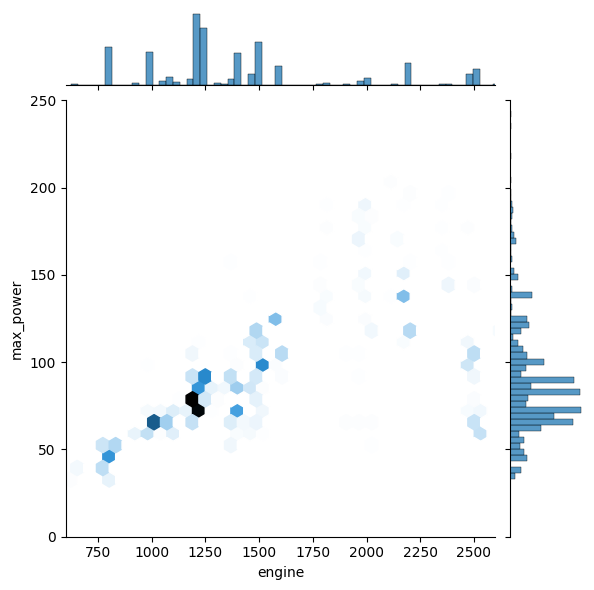

In [37]:
sns.jointplot(x= "engine", y= "max_power", kind= "hex", data= df)
plt.xlim(600, 2600)
plt.ylim(0, 250)

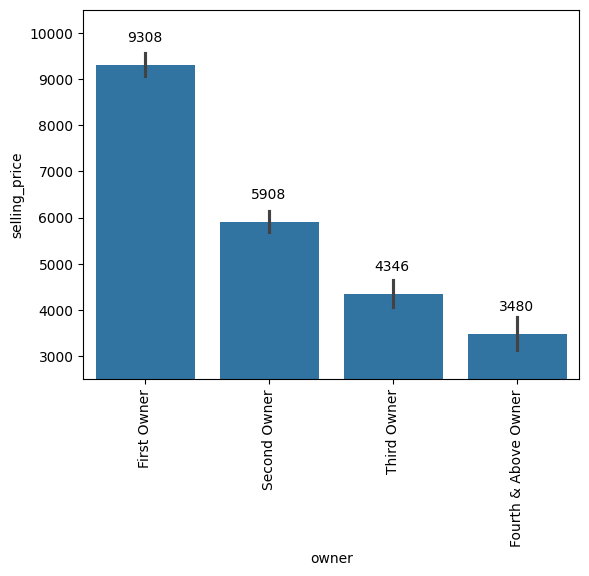

In [38]:
ax = sns.barplot(x=df[df["owner"]!="Test Drive Car"]["owner"], y="selling_price", data=df)
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+500))
plt.ylim(2500,10500);

<Axes: >

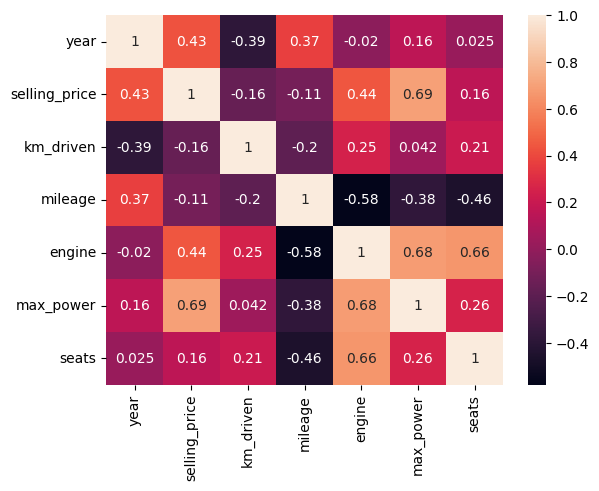

In [41]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

## *Dummies*

In [42]:
dummy_df = pd.get_dummies(df.drop("name", axis= 1))

In [43]:
dummy_df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,6750.0,145500,23.40,1248.0,74.00,5.0,False,True,False,...,False,True,False,False,True,True,False,False,False,False
1,2014,5550.0,120000,21.14,1498.0,103.52,5.0,False,True,False,...,False,True,False,False,True,False,False,True,False,False
2,2006,2370.0,140000,17.70,1497.0,78.00,5.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,2010,3375.0,127000,23.00,1396.0,90.00,5.0,False,True,False,...,False,True,False,False,True,True,False,False,False,False
4,2007,1950.0,120000,16.10,1298.0,88.20,5.0,False,False,False,...,False,True,False,False,True,True,False,False,False,False


## *Scaling*

In [44]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

In [45]:
scaled = scaler.fit_transform(dummy_df)

In [48]:
df_scale = pd.DataFrame(scaled, columns= dummy_df.columns)

<Axes: >

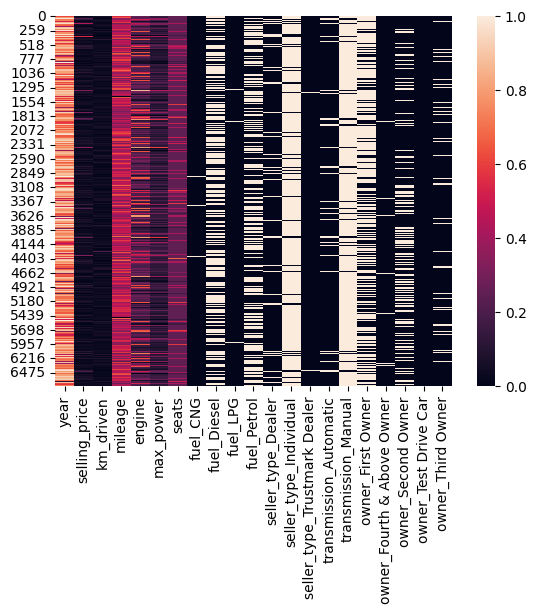

In [49]:
sns.heatmap(df_scale)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


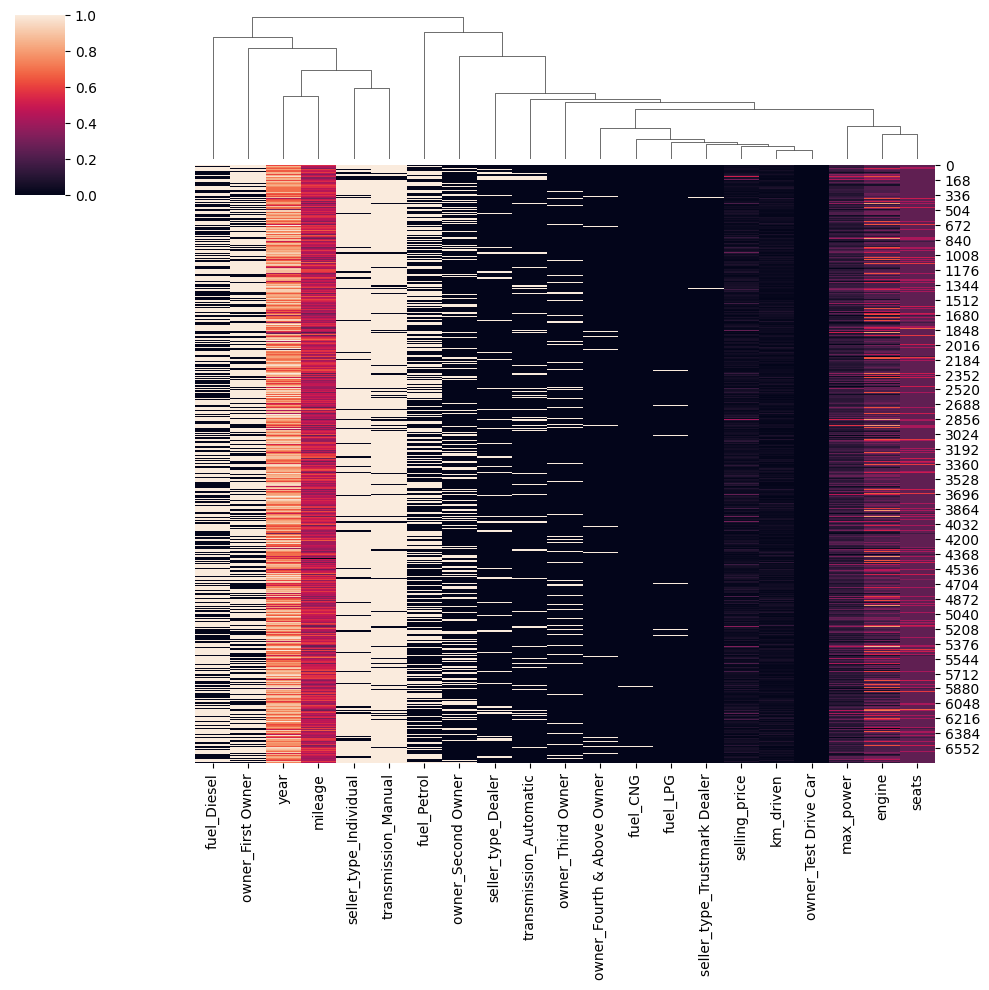

In [51]:
sns.clustermap(df_scale, row_cluster= False)

## *Modelling*

In [71]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters= 6)

In [72]:
cluster = model.fit_predict(df_scale)

In [73]:
print(len(cluster))

6717


In [74]:
cluster

array([3, 4, 0, ..., 5, 0, 3])

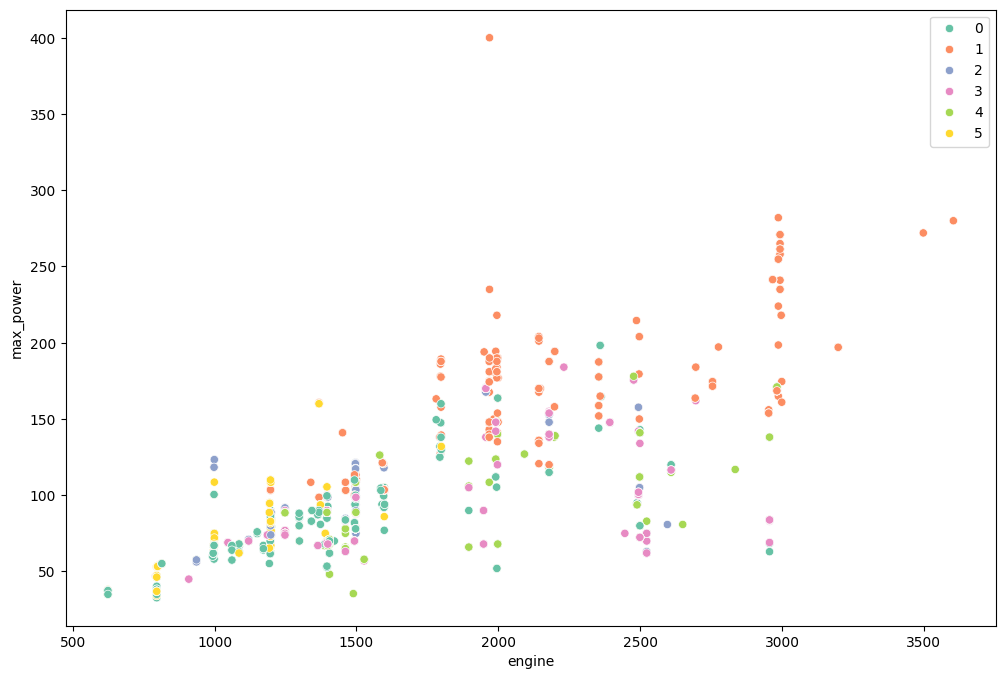

In [80]:
plt.figure(figsize= (12, 8))
sns.scatterplot(data= df, x= "engine", y= "max_power", hue= cluster, palette= "Set2");

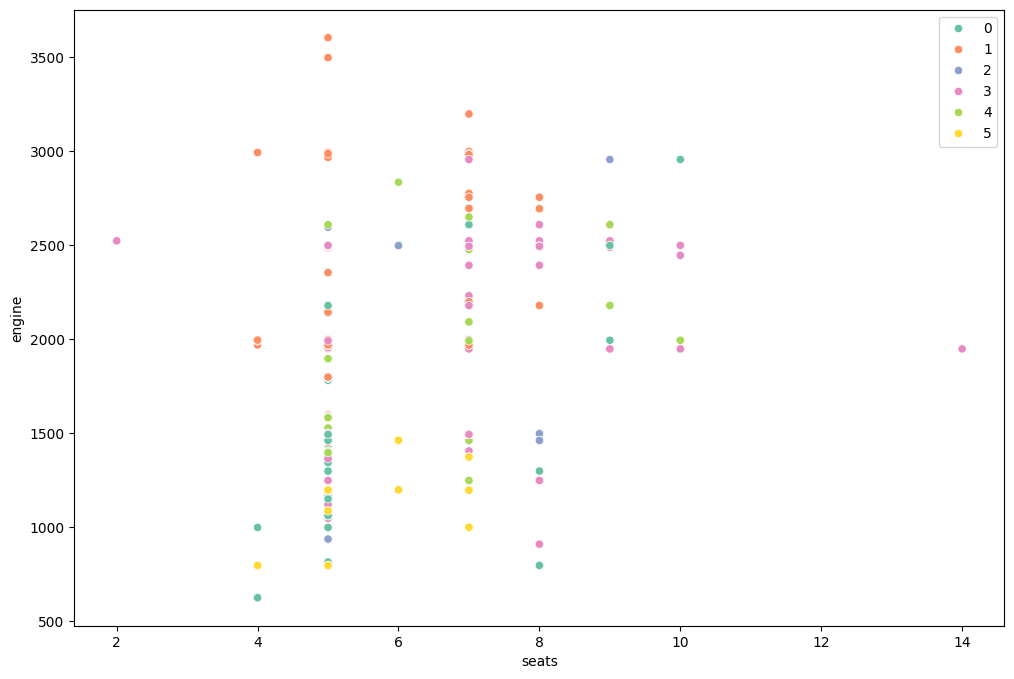

In [81]:
plt.figure(figsize= (12, 8))
sns.scatterplot(data= df, x= "seats", y= "engine", hue= cluster, palette= "Set2");

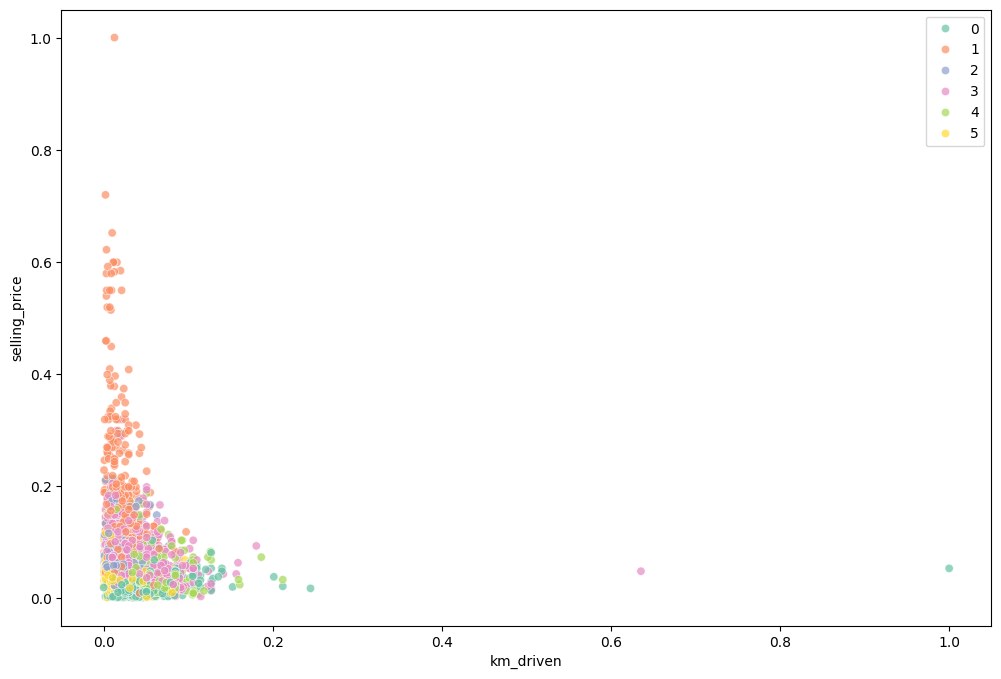

In [82]:
plt.figure(figsize= (12, 8))
sns.scatterplot(data= df_scale, x= "km_driven", y= "selling_price", hue= cluster, alpha= 0.7, palette= "Set2");

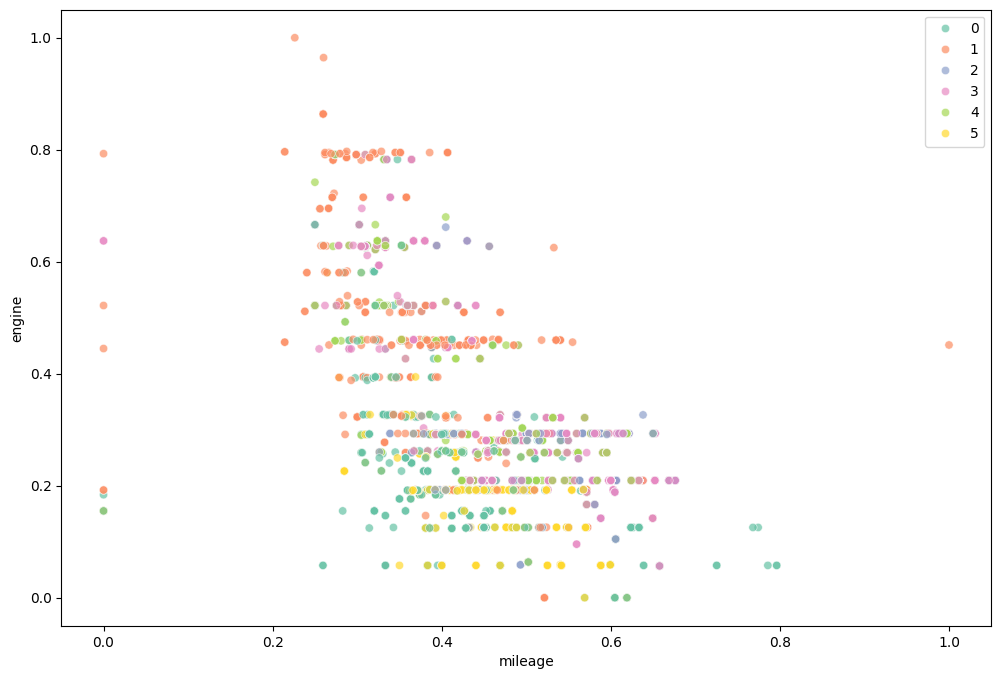

In [83]:
plt.figure(figsize= (12, 8))
sns.scatterplot(data= df_scale, x= "mileage", y= "engine", hue= cluster, alpha= 0.7, palette= "Set2");

## *Calculating Distance*

In [86]:
np.sqrt(len(df_scale.columns))

4.58257569495584

In [87]:
model = AgglomerativeClustering(n_clusters= None, distance_threshold= 0)

In [88]:
cluster_0 = model.fit_predict(df_scale)
cluster_0

array([3517, 6315, 6663, ...,    5,    2,    0])

In [89]:
len(np.unique(cluster_0))

6717

### **Dendrogram**

In [90]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

linkage = hierarchy.linkage(model.children_)

In [91]:
linkage

array([[1.33000000e+03, 2.92400000e+03, 1.41421356e+00, 2.00000000e+00],
       [8.15000000e+02, 4.69100000e+03, 2.23606798e+00, 2.00000000e+00],
       [5.65100000e+03, 5.78400000e+03, 2.23606798e+00, 2.00000000e+00],
       ...,
       [6.15400000e+03, 1.34270000e+04, 4.73511352e+02, 6.71400000e+03],
       [6.55400000e+03, 1.34280000e+04, 4.76026260e+02, 6.71500000e+03],
       [6.39400000e+03, 1.34290000e+04, 7.26006198e+02, 6.71600000e+03]])

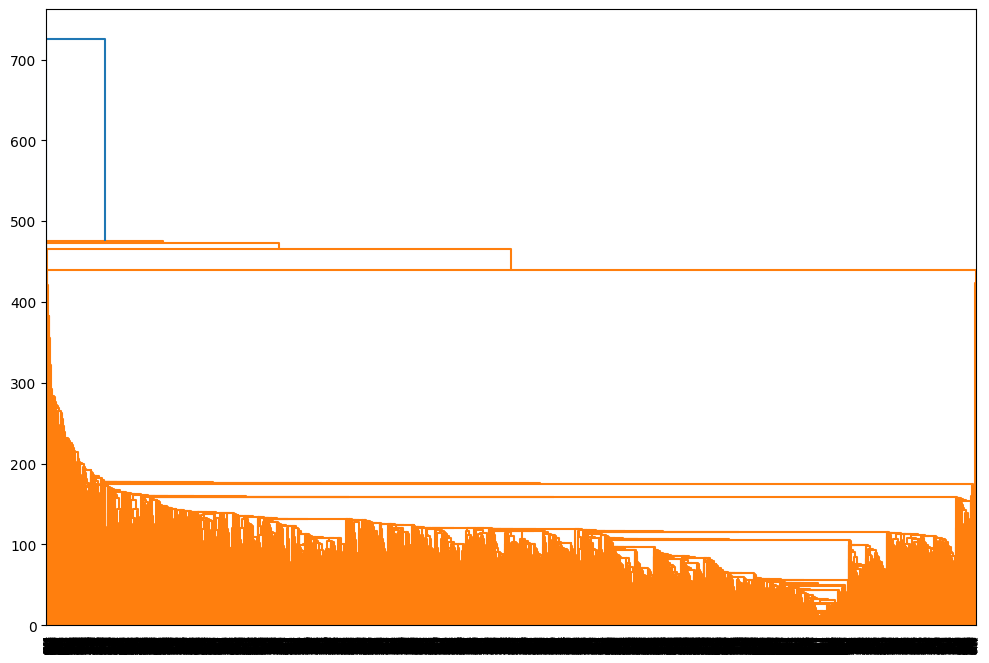

In [92]:
plt.figure(figsize= (12, 8))
dendrogram = hierarchy.dendrogram(linkage)

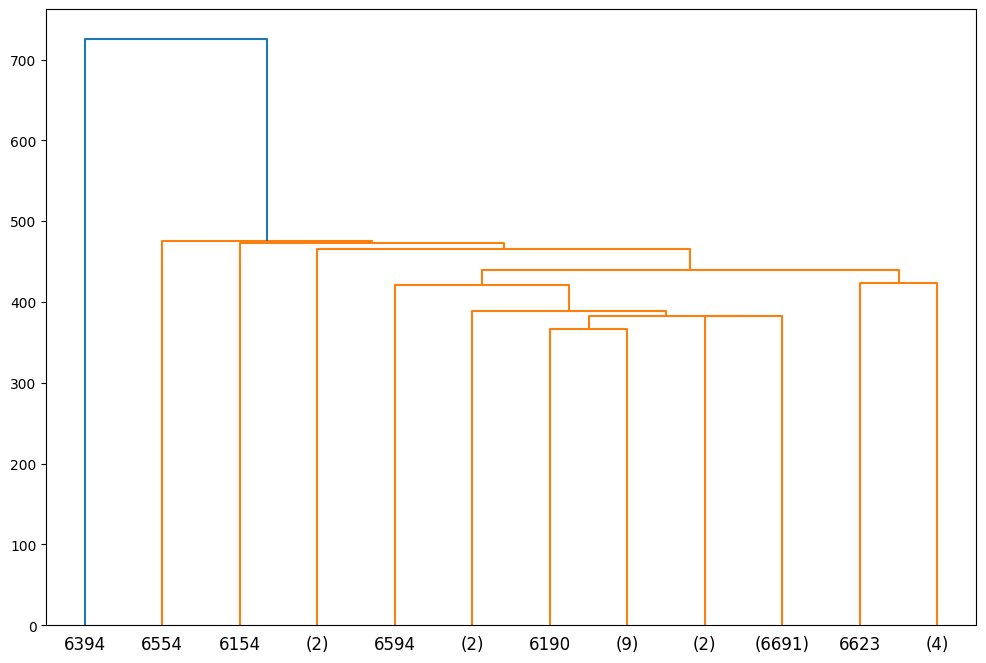

In [95]:
plt.figure(figsize= (12, 8))
dendrogram = hierarchy.dendrogram(linkage, truncate_mode= "lastp", p= 12)

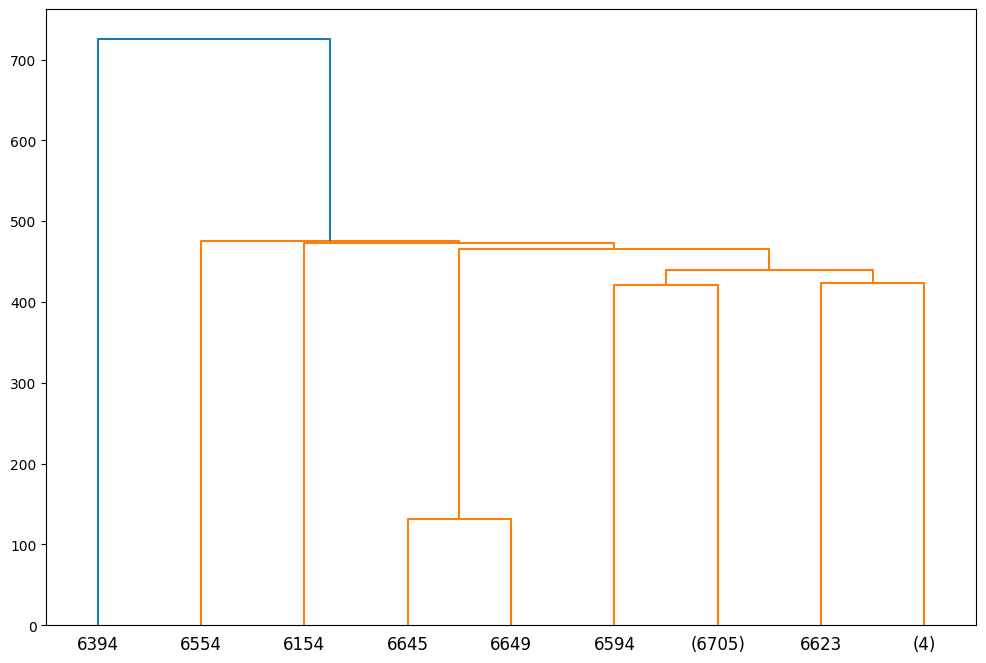

In [97]:
plt.figure(figsize= (12, 8))
dendrogram = hierarchy.dendrogram(linkage, truncate_mode= "level", p= 5)

In [98]:
print(df_scale["engine"].idxmax())
print(df_scale["engine"].idxmin())

129
348


In [102]:
max = df_scale.iloc[129]
min = df_scale.iloc[348]

distance = np.linalg.norm(max - min)

distance

2.405670403072852

In [103]:
model = AgglomerativeClustering(n_clusters= None, distance_threshold= 2.4)

In [104]:
cluster = model.fit_predict(df_scale)
cluster

array([17,  9,  0, ..., 11, 24, 32])

In [105]:
len(np.unique(cluster))

55

In [106]:
linkage = hierarchy.linkage(model.children_)
linkage

array([[1.33000000e+03, 2.92400000e+03, 1.41421356e+00, 2.00000000e+00],
       [8.15000000e+02, 4.69100000e+03, 2.23606798e+00, 2.00000000e+00],
       [5.65100000e+03, 5.78400000e+03, 2.23606798e+00, 2.00000000e+00],
       ...,
       [6.15400000e+03, 1.34270000e+04, 4.73511352e+02, 6.71400000e+03],
       [6.55400000e+03, 1.34280000e+04, 4.76026260e+02, 6.71500000e+03],
       [6.39400000e+03, 1.34290000e+04, 7.26006198e+02, 6.71600000e+03]])

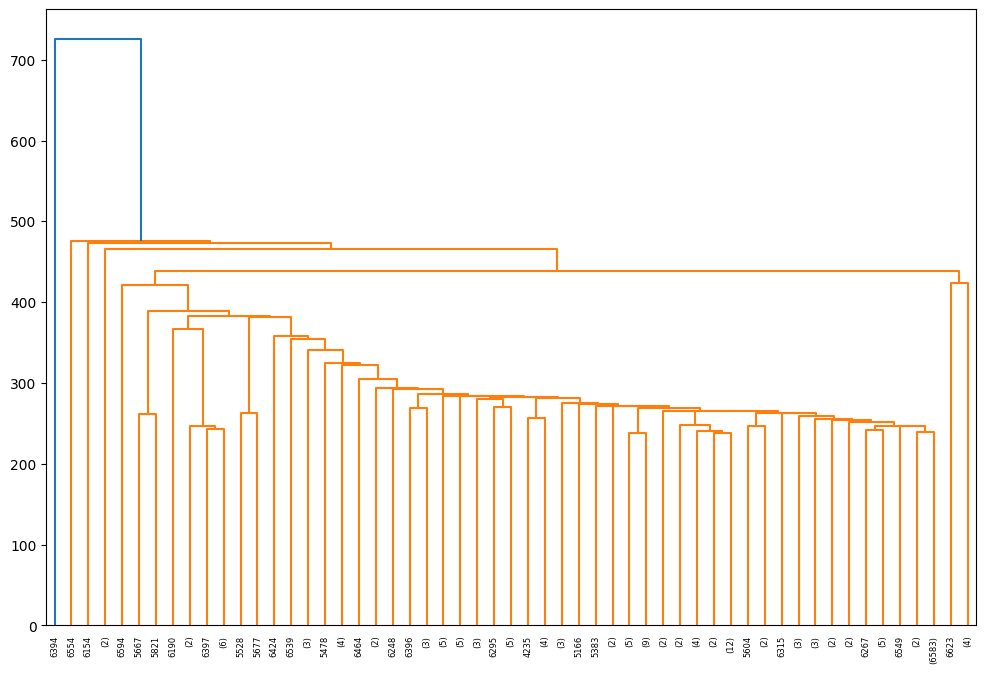

In [108]:
plt.figure(figsize= (12, 8))
dendrogram = hierarchy.dendrogram(linkage, truncate_mode= "lastp", p= 55)